# Exploring simple models using the Functional API

 For complex models the functional API becomes necessary. It allows you to do more complex things that just aren’t possible with the Sequential model such as models with shared layers and multiple inputs and outputs. As you begin to design models that require these things the functional API comes in handy

First, we will generate a set of data to allow us to test out the functional api

In [1]:
import numpy as np

count = 5000
x1 = np.random.randn(count)
x2 = np.random.randn(count)
x3 = np.random.randn(count)
y_classifier = np.array([1 if (x1[i] + x2[i] + (x3[i])/3 + np.random.randn(1) > 1) else 0 for i in range(count)])
y_count = x1 + x2 + x3/3 + np.random.randn(count)
data_output = np.array([x1, x2, x3]).transpose()

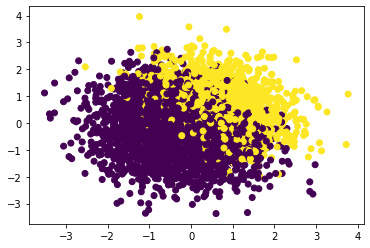

In [2]:
# Take a look at the data
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data_output[:,0],data_output[:,1], c=y_classifier)

Let's split up the data into training and test data sets

In [3]:
idx_list = np.linspace(0,4999,num=5000)
idx_test = np.random.choice(count, size = 500, replace=False)
idx_train = np.delete(idx_list, idx_test).astype('int')

# Split data into test and train
data_train = data_output[idx_train,:]
data_test = data_output[idx_test,:]
y_classifier_train = y_classifier[idx_train]
y_classifier_test = y_classifier[idx_test]
y_count_train = y_count[idx_train]
y_count_test = y_count[idx_test]

Now we have to import the Keras model packages

In [4]:
from keras.models import Input, Model
from keras.layers import Dense

Using TensorFlow backend.


### Logistic Regression
First let's build a simple logistic regression model using the Keras functional api. 

The input layer needs to have shape (a,) where a is the number of columns in your training matrix. Since we have three columns let's set the shape to (3,)
The output layer needs to have the same number of dimensions as the output which, in this case, has 1 dimension, so our dense layer needs to have 1 dimension.

In [5]:
inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)

logistic_model.compile(optimizer='sgd',
                       loss = 'binary_crossentropy',
                       metrics=['accuracy'])

logistic_model.optimizer.lr = 0.01
logistic_model.fit(x=data_train, y=y_classifier_train, epochs = 10,  validation_data = (data_test, y_classifier_test))

W1110 20:55:53.710264 20540 deprecation_wrapper.py:119] From C:\Users\jdeha\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1110 20:55:53.724434 20540 deprecation_wrapper.py:119] From C:\Users\jdeha\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1110 20:55:53.730432 20540 deprecation_wrapper.py:119] From C:\Users\jdeha\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1110 20:55:53.747432 20540 deprecation_wrapper.py:119] From C:\Users\jdeha\Anaconda3\envs\keras\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1110 20:55:53.766434 20540 deprecat

Train on 4500 samples, validate on 500 samples
Epoch 1/10
4500/4500 [==============================] - 0s 92us/step - loss: 0.6832 - acc: 0.5873 - val_loss: 0.6044 - val_acc: 0.6560
Epoch 2/10
4500/4500 [==============================] - 0s 25us/step - loss: 0.5616 - acc: 0.7118 - val_loss: 0.5196 - val_acc: 0.7580
Epoch 3/10
4500/4500 [==============================] - 0s 25us/step - loss: 0.4936 - acc: 0.7836 - val_loss: 0.4705 - val_acc: 0.8060
Epoch 4/10
4500/4500 [==============================] - 0s 24us/step - loss: 0.4534 - acc: 0.8124 - val_loss: 0.4401 - val_acc: 0.8240
Epoch 5/10
4500/4500 [==============================] - 0s 25us/step - loss: 0.4279 - acc: 0.8216 - val_loss: 0.4199 - val_acc: 0.8300
Epoch 6/10
4500/4500 [==============================] - 0s 26us/step - loss: 0.4108 - acc: 0.8298 - val_loss: 0.4057 - val_acc: 0.8360
Epoch 7/10
4500/4500 [==============================] - 0s 29us/step - loss: 0.3986 - acc: 0.8331 - val_loss: 0.3953 - val_acc: 0.8440
Epoch 8/

### Simple Neural Network
Now let's explore how to implement a simple neural network with one hidden layer using the functional api. We will have input of 3 dimensions and output of 1 dimension. This time, notice that unlike with the sequential model, you build the model of an array of inputs and outputs.

In [6]:
inputs = Input(shape=(3,))
x = Dense(50, activation='relu')(inputs)
output = Dense(1, activation = 'sigmoid')(x)
neural_net = Model(inputs, output )

neural_net.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

neural_net.fit(x=data_train, y=y_classifier_train, epochs=10, verbose=1, validation_data=(data_test, y_classifier_test))

Train on 4500 samples, validate on 500 samples
Epoch 1/10
4500/4500 [==============================] - 1s 133us/step - loss: 0.5574 - acc: 0.7240 - val_loss: 0.4144 - val_acc: 0.8440
Epoch 2/10
4500/4500 [==============================] - 0s 29us/step - loss: 0.3782 - acc: 0.8338 - val_loss: 0.3522 - val_acc: 0.8440
Epoch 3/10
4500/4500 [==============================] - 0s 35us/step - loss: 0.3525 - acc: 0.8347 - val_loss: 0.3424 - val_acc: 0.8480
Epoch 4/10
4500/4500 [==============================] - 0s 30us/step - loss: 0.3484 - acc: 0.8342 - val_loss: 0.3412 - val_acc: 0.8460
Epoch 5/10
4500/4500 [==============================] - 0s 30us/step - loss: 0.3472 - acc: 0.8349 - val_loss: 0.3401 - val_acc: 0.8460
Epoch 6/10
4500/4500 [==============================] - 0s 32us/step - loss: 0.3466 - acc: 0.8362 - val_loss: 0.3394 - val_acc: 0.8540
Epoch 7/10
4500/4500 [==============================] - 0s 29us/step - loss: 0.3462 - acc: 0.8367 - val_loss: 0.3410 - val_acc: 0.8460
Epoch 8

### Multi-layer Neural Network
Now let's take a look at how you can use the functional api to add in multiple layers

In [7]:
from keras.layers import Dropout

# specify how many hidden layers to add
layers = 5

inputs = Input(shape=(3,))
x = Dense(200, activation='relu')(inputs)
x = Dropout(0.4)(x)
for layer in range(layers):
    x = Dense(200, activation='relu')(x)
    x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)
complex_neural = Model(inputs, output)

complex_neural.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])

complex_neural.fit(data_train, y_classifier_train, epochs = 10, verbose=1,validation_data = (data_test, y_classifier_test))

W1110 20:55:57.759613 20540 deprecation.py:506] From C:\Users\jdeha\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 4500 samples, validate on 500 samples
Epoch 1/10
4500/4500 [==============================] - 2s 456us/step - loss: 0.4137 - acc: 0.8013 - val_loss: 0.3413 - val_acc: 0.8500
Epoch 2/10
4500/4500 [==============================] - 1s 258us/step - loss: 0.3674 - acc: 0.8304 - val_loss: 0.3459 - val_acc: 0.8440
Epoch 3/10
4500/4500 [==============================] - 1s 214us/step - loss: 0.3694 - acc: 0.8351 - val_loss: 0.3634 - val_acc: 0.8500
Epoch 4/10
4500/4500 [==============================] - 1s 247us/step - loss: 0.3632 - acc: 0.8304 - val_loss: 0.3554 - val_acc: 0.8460
Epoch 5/10
4500/4500 [==============================] - 1s 240us/step - loss: 0.3668 - acc: 0.8342 - val_loss: 0.3395 - val_acc: 0.8540
Epoch 6/10
4500/4500 [==============================] - 1s 238us/step - loss: 0.3583 - acc: 0.8296 - val_loss: 0.3538 - val_acc: 0.8480
Epoch 7/10
4500/4500 [==============================] - 1s 219us/step - loss: 0.3594 - acc: 0.8333 - val_loss: 0.3466 - val_acc: 0.8420
E

In [ ]:
t